In [ ]:
#get oauth token
#https://twitchapps.com/tmi/

#Dieses Skript gilt nur für LIVE Aufzeichnungen

In [9]:
#Kernel 3.9.13

from twitch_listener import listener


# Connect to Twitch
bot = listener.connect_twitch('mckytv', 
                             'oauth:sweozc63jm1l2wq6p1vltlx81gelo8', 
                             '6wk5itntbput1tddde1lo7o1zuym20')

# List of channels to connect to
channels_to_listen_to = ['mckytv']

# Scrape live chat data into raw log files. (Duration is seconds)
bot.listen(channels_to_listen_to, duration = 400) 

# Convert log files into .CSV format
bot.parse_logs(timestamp = True)

# Generate adjacency matrix
#bot.adj_matrix(weighted = False, matrix_name = "streamer_network.csv")


In [ ]:
#remove the column username
'''
def remove_column(file_name, column_index):
    with open(file_name, 'r') as f:
        reader = csv.reader(f)
        data = list(reader)
    with open(file_name, 'w') as f:
        writer = csv.writer(f)
        for row in data:
            del row[column_index]
            writer.writerow(row)


remove_column('trainwreckstv.csv', 1)
'''

In [10]:
import csv
import re
import matplotlib.pyplot as plt
import datetime


#Enter the name of the streamer from the URL
streamer = 'mckytv'


laughs = []
timestamps = []
all_messages = []
authors = []



def remove_time(string):
    return string[:8]


today = datetime.datetime.now().strftime("%Y-%m-%d")


with open(f'{streamer}.csv') as f:
    reader = csv.reader(f)
    for row in reader:
        
        try:
            #filter messages
            if row[0].startswith('!') or 'https://' in row[0] or 'http://' in row[0] or row[1].startswith('Streamlabs') or row[1].startswith('streamlabs') or 'bot' in row[1]:
                continue

            #only add unique authors
            if row[1] not in authors:
                authors.append(row[1])
                
                
            #replace 2022-05-31 with a space to extract timestamp
            if today in row[2]:
                row[2] = row[2].replace(today, '')
                row[2] = remove_time(row[2])
                timestamps.append(row[2])


                #extract laughs
                if "haha" in row[0] or "HAHA" in row[0] or "LUL" in row[0] or "LULW" in row[0] or ":D" in row[0].lower() or "LMAO" in row[0] or "Lmfao" in row[0] or "xd" in row[0] or "xD" in row[0] or "OMEGALUL" in row[0]:
                    laughs.append(row[2])
            
            
        except:
            pass
            
        all_messages.append(row[0])

        print(row)
        


  

            



['text', 'username', 'timestamp']
['GG', 'coldey7oq', ' 08:55:2']
['B2b', 'ub_masaki', ' 08:55:2']
['mckyLiebe mckyLiebe mckyLiebe mckyLiebe mckyLiebe mckyLiebe mckyLiebe mckyLiebe mckyLiebe mckyLiebe mckyLiebe mckyLiebe mckyLiebe mckyLiebe mckyLiebe mckyLiebe mckyLiebe mckyLiebe mckyLiebe mckyLiebe mckyLiebe', 'wienclown', ' 08:55:2']
['seyyn mckyLiebe', 'sunnycreme99', ' 08:55:2']
['pro', 'schmidt2297', ' 08:55:2']
['2020Glitchy 2020Glitchy 2020Glitchy 2020Glitchy', 'mahjong92', ' 08:55:2']
['Back to back', 'sinuxfps', ' 08:55:2']
['gg', 'coldey7oq', ' 08:55:2']
['<3 <3 <3 <3 <3 <3', 'hobby_loster', ' 08:55:2']
['B2B', 'ub_masaki', ' 08:55:2']
['genau back2back hahahaha', 'eatmorebanana', ' 08:55:2']
['G❤️ MICKY ❤️G', 'sonja_sun1', ' 08:55:2']
['B2B mckyHS xtheGier xtheGier', 'dequiall0', ' 08:55:2']
['B2B', 'champ3001', ' 08:55:2']
['xtheGier xtheGier xtheGier xtheGier', 'hobby_loster', ' 08:55:3']
['xtheGier xtheGier xtheGier xtheGier xtheGier xtheGier xtheGier xtheGier', 'i__dante

In [11]:
import itertools
from collections import Counter
from wordcloud import WordCloud
import plotly.express as px


print(f'Es wurden {len(all_messages)} Nachrichten bei ...{streamer}... geschrieben')  
print(f'Es haben {len(authors)} User bei ...{streamer}...im chat geschrieben')
#print(f'{round(len(all_messages) / len(authors), 3)} ...ist der Lurker Index.')
print(f'{round( len(authors) / len(all_messages) * 100, 2)}' + '%' + ' ...engagement Rate. (100% = Jeder user hat eine Nachricht geschrieben)')



#MOST WORDS COUNTER
most_common_words = Counter(all_messages).most_common(20)
#PLOT
fig = px.bar(x=[word[0] for word in most_common_words], y=[word[1] for word in most_common_words])
fig.show()






Es wurden 292 Nachrichten bei ...mckytv... geschrieben
Es haben 142 User bei ...mckytv...im chat geschrieben
48.63% ...engagement Rate. (100% = Jeder user hat eine Nachricht geschrieben)


In [12]:
#plot the timestamps
import plotly.graph_objects as go

#use the histogram to plot the timestamps
fig = go.Figure(data=[go.Histogram(x=timestamps)])
fig.show()


fig2 = go.Figure(data=[go.Histogram(x=laughs)])
fig2.show()


#10:47:3 means, the message occured between 10:47:30 and 10:47:39, (10 seconds intervall)

/var/folders/85/w6695fhx3ds_csvkj21k04zm0000gn/T/ipykernel_1196/4178609563.py:19: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



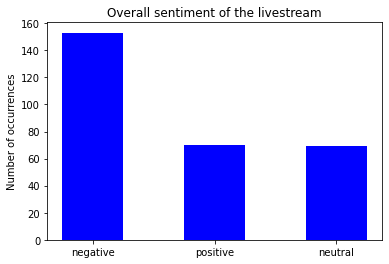

In [14]:
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import time
from transformers import AutoTokenizer, AutoModelForSequenceClassification


#SENTIMENT ANALYSE

model_name = 'oliverguhr/german-sentiment-bert'

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

X_train_german= all_messages


batch = tokenizer(X_train_german, padding=True, truncation=True, max_length = 512, return_tensors='pt')
batch = torch.tensor(batch['input_ids'])
#print(batch)

with torch.no_grad():
    outputs = model(batch)
    label_ids = torch.argmax(outputs.logits, dim=1)
    #print(label_ids)
    labels = [model.config.id2label[label_id] for label_id in label_ids.tolist()]
    #print(labels)


#Count the labels
count = Counter(labels)


#plot the number of times each sentiment occurs in a bar chart
def plot_counts(count):
    """
    Plot the number of times each sentiment occurs in a bar chart.
    """
    plt.bar(count.keys(), count.values(), width=0.5, color='blue')
    #make the graph look nicer
    plt.title('Overall sentiment of the livestream')
    
    plt.ylabel('Number of occurrences')
    
    #make the text bigger
    plt.show()



plot_counts(count)    